# Import Library

In [1]:
#import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#library workcloud
from wordcloud import WordCloud, STOPWORDS

#import seaborn
import seaborn as sns

#import Folium
import folium

# Read Dataset

In [2]:
missing_values = ["n/a","na","--"]
df =  pd.read_csv("dataset/london_crime_by_lsoa.csv", na_values=missing_values)
print('data downloaded and read into a dataframe')

data downloaded and read into a dataframe


In [3]:
print('Top 10 of dataset')
df.head(10)

Top 10 of dataset


,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


# Preprocessing Dataset

1. mengetahui jumlah dimensi dari dataframe
2. mengetahui tipe data setiap atribut kolom
3. mengetahui nama-nama setiap kolom
4. mengetahui missing values dan jumlah missing values setiap kolom
5. mengatasi missing value (jika ada)

In [4]:
print('dimension of dataframe: ', df.shape)

dimension of dataframe:  (13490604, 7)


In [5]:
print('type of dataframe: \n')
print(df.dtypes)

type of dataframe: 

lsoa_code         object
borough           object
major_category    object
minor_category    object
value              int64
year               int64
month              int64
dtype: object


In [6]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

## The dataset contains :
* lsoa_code : this represents a policing area
* borough : the london borough for which the statistic related
* major_category : the major crime category
* minor_category : the minor crime category
* value : The count of the crime for the particular borough , in that particular month
* year: the year of the summary statistics
* month : the month of the summary statistic 

In [7]:
print(df.isnull().sum())

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64


In [8]:
# Summarizing all missing values (total missing values)
print('Total Missing Value: ', df.isnull().sum().sum())

Total Missing Value:  0


# Visualisasi

# Pie Chart
Question : Mengetahui Persentase Kejahatan Kategori Major (Major Crimes) ynag terjadi di London

In [9]:
# kejahatan major (major crimes)  yang terjadi di London
df_major_category = df.groupby('major_category', axis=0).sum()
df_major_category

,value,year,month
major_category,,,
Burglary,754293,2099731248,6783426
Criminal Damage,630938,4163174064,13449618
Drugs,470765,2373089616,7666542
Fraud or Forgery,5325,475878240,1537380
Other Notifiable Offences,106349,1561923648,5045976
Robbery,258873,1890040608,6105996
Sexual Offences,1273,217513296,702702
Theft and Handling,2661861,7980195600,25780950
Violence Against the Person,1558081,6381548928,20616336


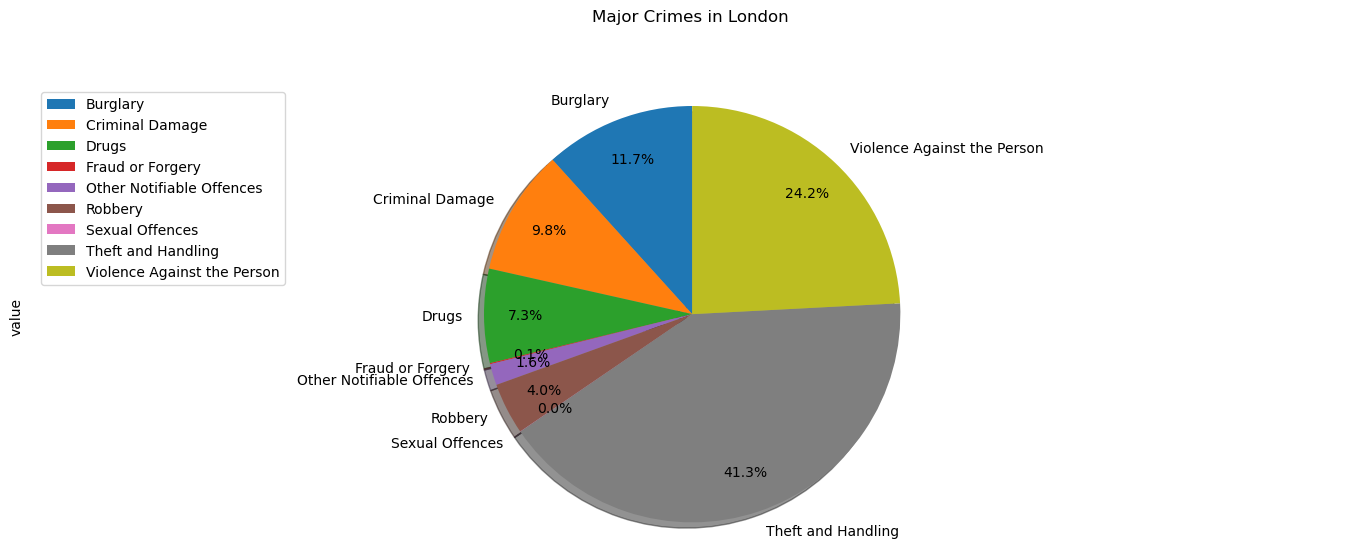

In [10]:
df_major_category['value'].plot(kind='pie',
                                figsize=(17,6),
                                autopct = '%1.1f%%',
                                startangle=90,
                                shadow=True,
                                pctdistance=0.8
                               )
plt.title('Major Crimes in London ', y=1.12)
plt.axis('equal')
plt.legend(labels=df_major_category.index , loc='upper left')
plt.show()

Pada Pie Chart dapat dilihat jika tingkat kejahatan tertinggi pada category major crime ada pada Theft dan Handling dengan persentase 41.3% 

# Bar Chart
Question: Mengetahui TOP 5 daerah London dengan tingkat kejahatan terendah


In [11]:
df_borough = df.borough.value_counts().sort_values()
df_borough

City of London              9720
Kingston upon Thames      259524
Kensington and Chelsea    296784
Richmond upon Thames      304128
Barking and Dagenham      311040
Sutton                    322488
Hammersmith and Fulham    328752
Merton                    339876
Islington                 359208
Harrow                    365688
Westminster               366660
Camden                    378432
Bexley                    385668
Hounslow                  395928
Havering                  399600
Waltham Forest            406296
Tower Hamlets             412128
Haringey                  413856
Hackney                   417744
Greenwich                 421200
Hillingdon                442584
Redbridge                 445716
Newham                    471420
Southwark                 483300
Lewisham                  485136
Brent                     490644
Wandsworth                498636
Enfield                   511164
Lambeth                   519048
Bromley                   523908
Ealing    

In [12]:
# question : 5 daerah di london dengan kejahatan terendah 
df_borough.head()

City of London              9720
Kingston upon Thames      259524
Kensington and Chelsea    296784
Richmond upon Thames      304128
Barking and Dagenham      311040
Name: borough, dtype: int64

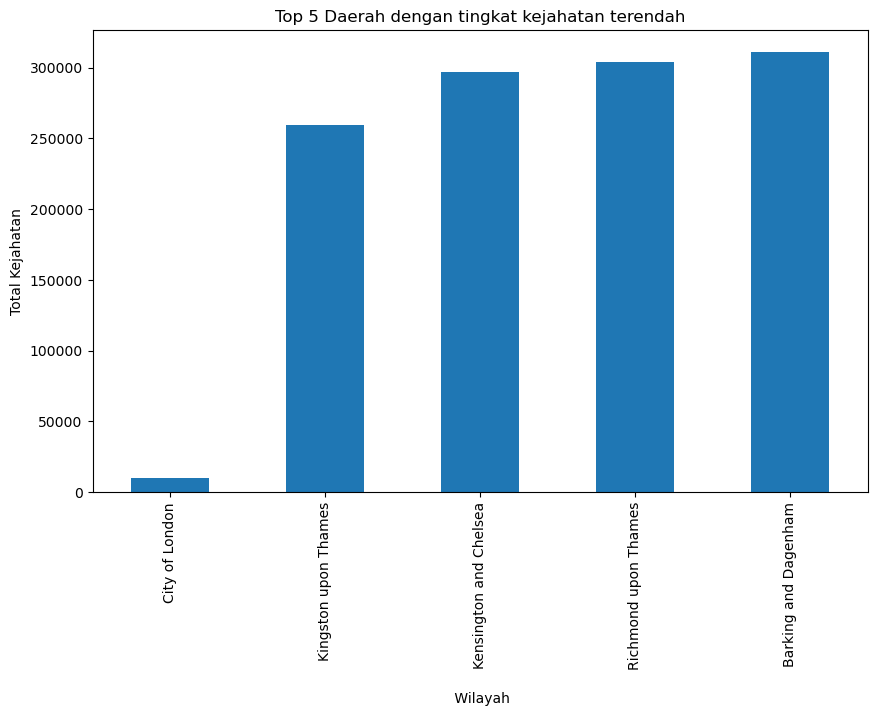

In [13]:
df_borough.head().plot(kind='bar', figsize=(10,6))
plt.xlabel('\n Wilayah')
plt.ylabel('Total Kejahatan')
plt.title('Top 5 Daerah dengan tingkat kejahatan terendah')

plt.show()

Pada Bar Chart dapat dilihat jika kejahatan tahunan terendah terdapat pada daerah city of london dengan dengan jumlah kejahatan 9720

 Question : Top 5 kejahatan kategori minor terbanyak/tertinggi di London

In [14]:

df_minor_category = df.minor_category.value_counts(ascending=False)
df_minor_category

Common Assault                            522180
Theft From Motor Vehicle                  522180
Other Theft                               522180
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

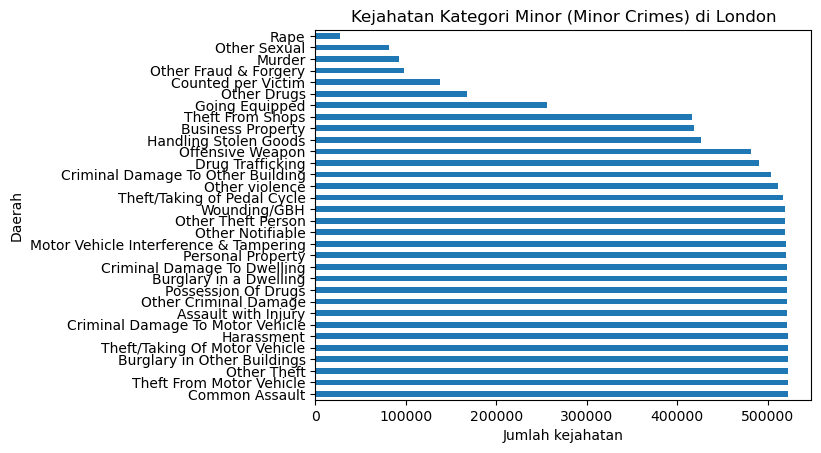

In [15]:
df_minor_category.plot(kind='barh')
plt.title('Kejahatan Kategori Minor (Minor Crimes) di London')
plt.xlabel('Jumlah kejahatan')
plt.ylabel('Daerah')
plt.show()

Pada Bar Chart diatas dapat dilihat bahwa Common Assaul, Theft From Motor Vehicle, dan Other Theft merupakan kategori kejahatan minor terbanyak dengan total kejahatan 522180 . sedangkan Rape merupakan kategori kejahatan minor terendah dengan total kasus 27000 

# Line Chart
Question : mengetahui banyaknya kejahatan yang terjadi per tahun 2018 -2016

In [16]:
crimes_per_year, crimes_per_month = {},{}
months = ['1','2','3','4','5','6','7','8','9','10','11','12']

for year in np.sort(df['year'].unique()):
    crimes_year = df.loc[(df['year']==year)]
    crimes_per_year[year]=sum(crimes_year['value'])
    crimes_per_month[year]=[]
    
    for month in months:
        crimes_month = crimes_year.loc[crimes_year['month']==month]
        crimes_per_month[year].append(sum(crimes_month['value']))

value_sort= list(crimes_per_year.values())
value_sort.sort()
cpmMatrix = np.mean([crimes_per_month[key] for key in crimes_per_year.keys()], axis=0)

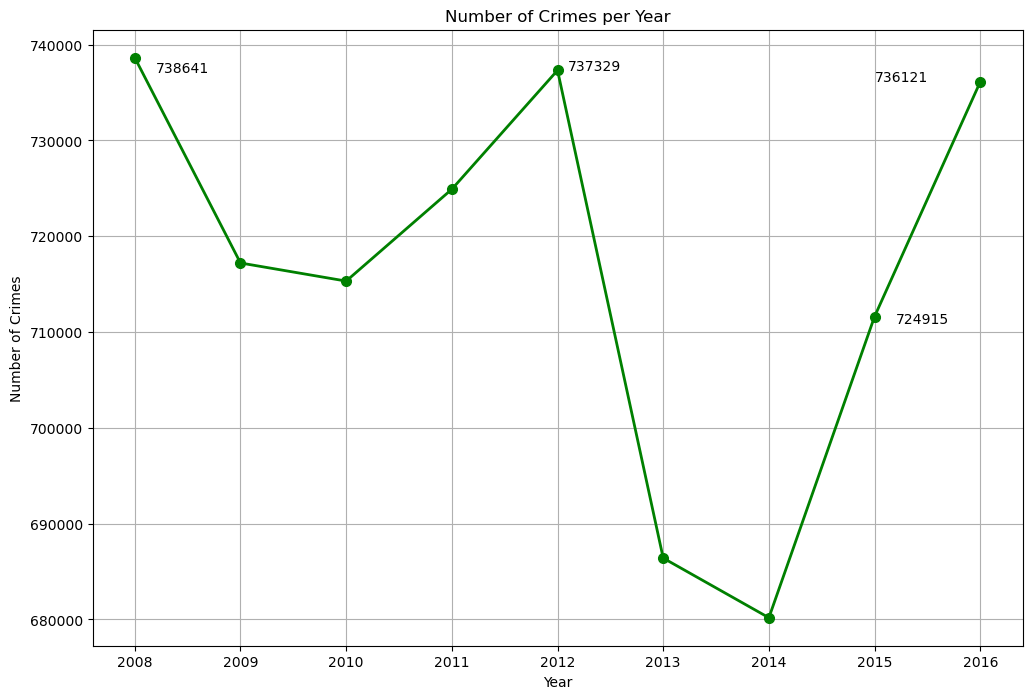

In [17]:
plt.figure(figsize=(12,8))
plt.plot(range(len(crimes_per_year.keys())), list(crimes_per_year.values()),
        linewidth=2, color='green', marker='o',markersize=7.0)
plt.annotate(value_sort[-1], (0.2, value_sort[-1] - 1500))
plt.annotate(value_sort[-2], (4.1, value_sort[-2]))
plt.annotate(value_sort[-3], (7., value_sort[-3]))
plt.annotate(value_sort[-4], (7.2, value_sort[-7]-700))

plt.xticks(range(len(crimes_per_year.keys())), crimes_per_year.keys())
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Year')
plt.grid()

Dari Line Chart diatas, dapat dilihat bahwa jumlah kejahatan terbanyak terjadi pada tahun 2008 dengan total kejahatan 738641 

# Scatter Plot
Question : banyak kejahatan yang terjadi perbulan di tahun 2012

In [18]:
year2012 = df.loc[df['year']==2012]
months = year2012['month'].unique()
months.sort()

sum_month=year2012.groupby(['month']).sum()

Values=sum_month['value'].to_numpy()
name_of_months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
print("no of crime in each month in the year 2016")
print(name_of_months)
print(Values)
n1 = np.arange(len(months))
xrange=range(1,13)

no of crime in each month in the year 2016
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
[62436 56735 67537 58801 64344 62281 63280 62143 56912 61728 62514 58618]


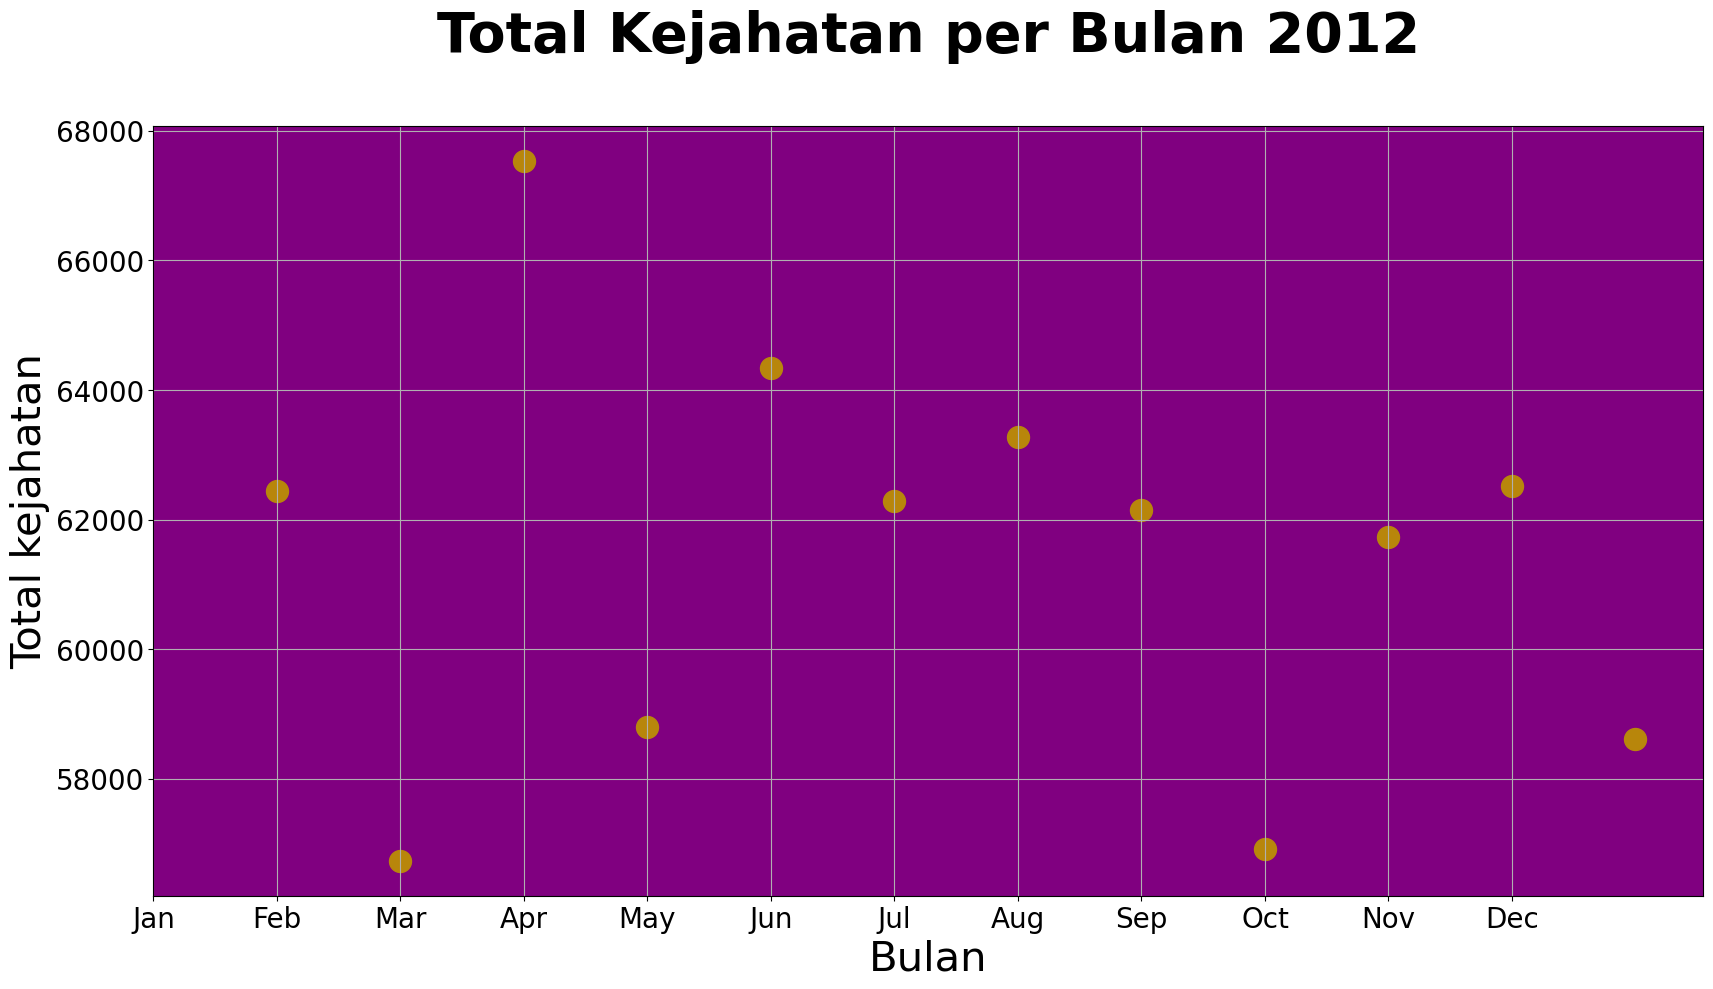

In [19]:
plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_facecolor("purple")
plt.scatter(xrange,Values,s=250,color='darkgoldenrod',cmap='viridis',alpha=1)
plt.title("Total Kejahatan per Bulan 2012\n", fontsize=40, fontweight='bold')
plt.xlabel('Bulan',fontsize=30,color='black')
plt.ylabel('Total kejahatan',fontsize=30,color='black')
plt.xticks(n1,name_of_months)
plt.xticks(color='black',fontsize=20)
plt.yticks(color='black',fontsize=20)
plt.grid()

# WordCloud
question : membuat wordcloud berdasarkan borough(daerah)

In [20]:
data_borough = df['borough']
data_borough

0              Croydon
1            Greenwich
2              Bromley
3            Redbridge
4           Wandsworth
               ...    
13490599         Brent
13490600    Hillingdon
13490601        Sutton
13490602       Croydon
13490603        Merton
Name: borough, Length: 13490604, dtype: object

In [21]:
data_borough = data_borough.to_csv('dataset/crime_by_borough.txt', header=None, index=None, sep=' ', mode='a')

In [22]:
#open file and read it into variable borough
borough = open('dataset/crime_by_borough.txt','r').read()
print('File downloaded and saved!')

File downloaded and saved!


In [23]:
stopwords = set(STOPWORDS)

In [24]:
#instantiate a word cloud object
borough_wc = WordCloud(
    background_color='white',
    max_words=100,
    stopwords = stopwords
).generate(borough)

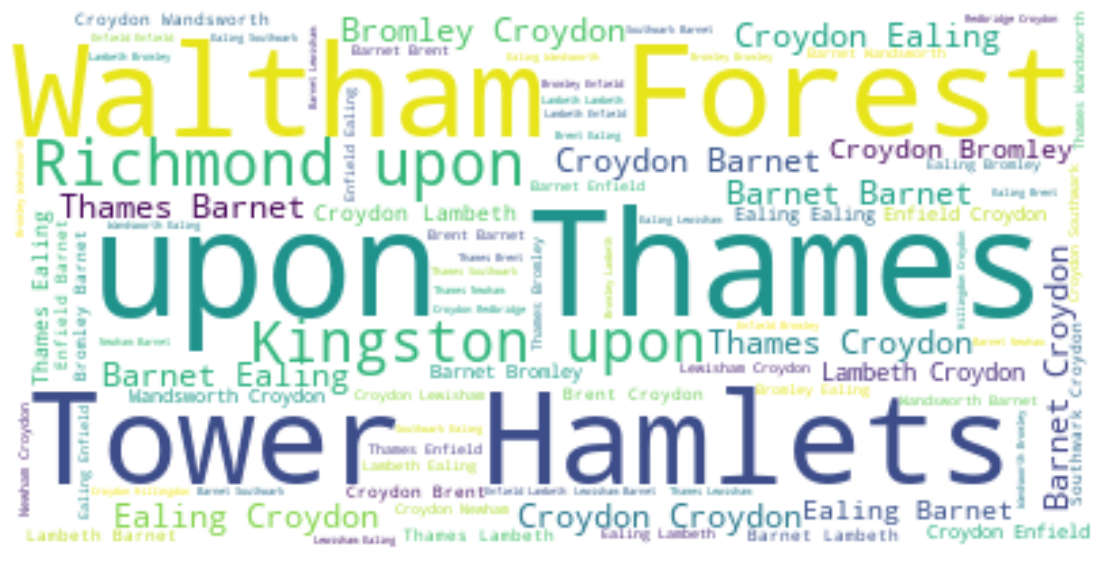

In [25]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) #set height 

#display the word cloud
plt.imshow(borough_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Folium
question: membuat folium berdasarkan peta london

In [26]:
# define the world map centered around London with higher zoom level
world_map = folium.Map(location=[ 51.5073509, -0.1277583], zoom_start=15)

#display world map
world_map

## Stamen Toner Maps

In [27]:
# Stamen Toner Maps London
world_map = folium.Map(location=[ 51.5073509, -0.1277583], zoom_start=13, tiles='Stamen Toner')

#display world map
world_map

# Overall Analysis

1. Pada Pie Chart dapat dilihat jika tingkat kejahatan tertinggi pada category major crime ada pada Theft dan Handling dengan persentase 41.3%
2. Pada Bar Chart dapat dilihat jika kejahatan tahunan terendah terdapat pada daerah city of london dengan dengan jumlah kejahatan 9720
3. Common Assaul, Theft From Motor Vehicle, dan Other Theft merupakan kategori kejahatan minor terbanyak dengan total kejahatan 522180 . sedangkan Rape merupakan kategori kejahatan minor terendah dengan total kasus 27000
4. jumlah kejahatan terbanyak terjadi pada tahun 2008 dengan total kejahatan 738641